<a href="https://colab.research.google.com/github/toba717/financial_engineering_projects/blob/main/financial_engineering_projects/markov_chain_based_stochastic_processes_for_portfolio_optimization/markov_chain_for_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
from dateutil.relativedelta import relativedelta

yf.pdr_override()

In [ ]:
#pull data from yahoofinance
end = '2023-03-13'
SPY = pdr.get_data_yahoo('SPY', start='2022-03-13', end=end, progress=False)
SPY

In [ ]:
tickers = pd.read_csv('SPtickers.csv')['Symbol']
tickers.replace({'BRK.B': 'BRK-B', 'BF.B': 'BF-B'}, inplace=True)
tickers = tickers[tickers != 'FBHS']
data = pdr.get_data_yahoo(list(tickers), start='2022-03-13', end='2023-03-13', progress=False)
data.to_csv('SP500-prices.csv')

In [ ]:
data = pd.read_csv('SP500-prices.csv',header=[0,1],index_col=0)
data['Adj Close']

In [ ]:
#compute daily returns
daily_returns = data['Adj Close'].pct_change(1)
daily_returns = daily_returns.iloc[1:]
daily_returns.dropna(axis=1, inplace=True)
daily_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-15,0.021163,0.092632,0.025606,0.029677,0.024852,0.035854,0.043560,0.016967,0.010360,0.027789,...,0.039474,0.010358,-0.056912,0.000419,0.018097,0.010845,0.012830,0.018390,0.005538,0.024098
2022-03-16,0.036230,0.057803,0.015910,0.029015,0.001091,-0.005879,0.016883,0.017024,-0.003418,0.027448,...,0.081272,-0.013954,-0.003756,0.019074,0.018594,0.042739,0.023406,0.037641,0.053550,0.014859
2022-03-17,0.013481,0.004857,0.010484,0.006454,0.016277,0.011296,0.044546,0.014396,-0.003215,-0.016651,...,0.023148,0.006498,0.026648,0.002879,0.011481,-0.004350,0.002377,0.044068,-0.007552,0.009170
2022-03-18,0.016810,0.012085,-0.008838,0.020919,0.003846,-0.001314,-0.010792,0.010313,-0.014194,0.013928,...,0.035626,-0.013056,-0.003925,-0.002051,-0.000340,0.024868,-0.012349,0.042518,-0.007170,0.011462
2022-03-21,-0.007044,-0.039403,-0.002859,0.008538,0.005339,0.007763,0.007919,-0.005635,0.028578,0.001698,...,-0.016949,0.007705,0.044871,0.012125,-0.004655,-0.028281,0.002236,-0.017476,-0.001326,-0.006074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06,-0.004863,-0.014670,-0.024191,0.018539,-0.004998,0.001985,0.000000,-0.016276,0.005610,0.001597,...,-0.003712,-0.000768,0.008864,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.010656,-0.014496,-0.015134,-0.020772,0.000000,-0.026959,-0.009902,-0.020139,...,-0.019411,-0.022137,-0.019330,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,-0.011070,0.008377,-0.021775,-0.008811,0.000000,-0.005801,-0.009861,-0.002044,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
days_within_bounds = {}

# Loop through each stock in the dataset
for stock in daily_returns.columns:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Calculate number of days within bounds for current stock
    days_within_bounds[stock] = ((returns >= lower_bound) & (returns <= upper_bound)).sum()

# Print results
print("Number of days within bounds for each stock:")
for stock, days in days_within_bounds.items():
    print(f"{stock}: {days} days")


In [ ]:
# Define upper bound for returns
upper_bound = 0.005

# Initialize dictionary to hold results
days_within_bounds = {}

# Loop through each stock in the dataset
for stock in daily_returns.columns:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Calculate number of days within bounds for current stock
    days_within_bounds[stock] = (returns > upper_bound).sum()

# Print results
print("Number of days with returns greater than upper bound for each stock:")
for stock, days in days_within_bounds.items():
    print(f"{stock}: {days} days")


In [ ]:
# Define lower bound for returns
lower_bound = -0.005

# Initialize dictionary to hold results
days_within_bounds = {}

# Loop through each stock in the dataset
for stock in daily_returns.columns:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Calculate number of days within bounds for current stock
    days_within_bounds[stock] = (returns < lower_bound).sum()

# Print results
print("Number of days with returns less than lower bound for each stock:")
for stock, days in days_within_bounds.items():
    print(f"{stock}: {days} days")


In [ ]:
# Calculate the number of positive trading days for each stock
positive_days = daily_returns[daily_returns > 0].count()

# Sort the stocks by the number of positive trading days
top_positive = positive_days.sort_values(ascending=False)[:10]

# Print the results
print("Top 10 stocks by number of positive trading days:")
for i, (stock, count) in enumerate(top_positive.items(), start=1):
    print(f"{i}. {stock}: {count} positive trading days")


Top 10 stocks by number of positive trading days:
1. VRTX: 144 positive trading days
2. TDG: 144 positive trading days
3. PCAR: 142 positive trading days
4. FANG: 141 positive trading days
5. MRK: 140 positive trading days
6. GIS: 140 positive trading days
7. ORLY: 140 positive trading days
8. CLX: 140 positive trading days
9. ULTA: 139 positive trading days
10. LKQ: 138 positive trading days


In [ ]:
# Define threshold return
threshold_return_high = 0.005

# Initialize dictionary to hold results
counts_high = {}

stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Count number of days with return greater than threshold
    count = len(returns[returns > threshold_return_high])
    
    # Add count to dictionary
    counts_high[stock] = count

# Print results
print("Number of days with return greater than", threshold_return_high, "for each stock:")
for stock, count in counts_high.items():
    if stock in stocks:
        print(f"{stock}: {count} days")


Number of days with return greater than 0.005 for each stock:
VRTX: 113 days
TDG: 110 days
PCAR: 96 days
FANG: 112 days
MRK: 92 days
GIS: 88 days
ORLY: 102 days
CLX: 104 days
ULTA: 108 days
LKQ: 100 days


In [ ]:
# Define threshold return
threshold_return_low = -0.005

# Initialize dictionary to hold results
counts_low = {}

stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Count number of days with return greater than threshold
    count = len(returns[returns < threshold_return_low])
    
    # Add count to dictionary
    counts_low[stock] = count

# Print results
print("Number of days with return less than", threshold_return_low, "for each stock:")
for stock, count in counts_low.items():
    if stock in stocks:
        print(f"{stock}: {count} days")


Number of days with return less than -0.005 for each stock:
VRTX: 83 days
TDG: 94 days
PCAR: 85 days
FANG: 94 days
MRK: 70 days
GIS: 71 days
ORLY: 77 days
CLX: 84 days
ULTA: 83 days
LKQ: 83 days


In [ ]:
# Define threshold returns
lower_threshold_return = -0.005
upper_threshold_return = 0.005

# Initialize dictionary to hold results
counts_mid = {}

stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Count number of days with return between thresholds
    count = len(returns[(returns >= lower_threshold_return) & (returns <= upper_threshold_return)])
    
    # Add count to dictionary
    counts_mid[stock] = count

# Print results
print("Number of days with return between", lower_threshold_return, "and", upper_threshold_return, "for each stock:")
for stock, count in counts_mid.items():
    if stock in stocks:
        print(f"{stock}: {count} days")



Number of days with return between -0.005 and 0.005 for each stock:
VRTX: 53 days
TDG: 45 days
PCAR: 68 days
FANG: 43 days
MRK: 87 days
GIS: 90 days
ORLY: 70 days
CLX: 61 days
ULTA: 58 days
LKQ: 66 days


In [ ]:
import pandas as pd

df_days = pd.concat([pd.Series(counts_low), pd.Series(counts_mid), pd.Series(counts_high)], axis=1)
df_days.columns = ['negative', 'neutral', 'positive']

print(df_days)

      negative  neutral  positive
VRTX        83       53       113
TDG         94       45       110
PCAR        85       68        96
FANG        94       43       112
MRK         70       87        92
GIS         71       90        88
ORLY        77       70       102
CLX         84       61       104
ULTA        83       58       108
LKQ         83       66       100


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_onetotwo = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from lower to within bounds
    for i in range(1, len(returns)):
        if returns.iloc[i-1] < lower_bound and lower_bound <= returns.iloc[i] <= upper_bound:
            count += 1
    
    # Add count to dictionary
    counts_onetotwo[stock] = count

# Print results
print("Number of transitions from returns less than lower bound to within bounds for each stock:")
for stock, count in counts_onetotwo.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")



Number of transitions from returns less than lower bound to within bounds for each stock:
VRTX: 13 transitions
TDG: 15 transitions
PCAR: 22 transitions
FANG: 17 transitions
MRK: 26 transitions
GIS: 24 transitions
ORLY: 18 transitions
CLX: 26 transitions
ULTA: 15 transitions
LKQ: 21 transitions


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_onetothree = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from lower to upper bounds
    for i in range(1, len(returns)):
        if returns.iloc[i-1] < lower_bound and returns.iloc[i] > upper_bound:
            count += 1
    
    # Add count to dictionary
    counts_onetothree[stock] = count

# Print results
print("Number of transitions from returns less than lower bound to greater than upper bound for each stock:")
for stock, count in counts_onetothree.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns less than lower bound to greater than upper bound for each stock:
VRTX: 41 transitions
TDG: 42 transitions
PCAR: 31 transitions
FANG: 42 transitions
MRK: 20 transitions
GIS: 25 transitions
ORLY: 36 transitions
CLX: 32 transitions
ULTA: 40 transitions
LKQ: 34 transitions


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_twotoone = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from within bounds to lower bound
    for i in range(1, len(returns)):
        if lower_bound <= returns.iloc[i-1] <= upper_bound and returns.iloc[i] < lower_bound:
            count += 1
    
    # Add count to dictionary
    counts_twotoone[stock] = count

# Print results
print("Number of transitions from returns within bounds to lower than lower bound for each stock:")
for stock, count in counts_twotoone.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns within bounds to lower than lower bound for each stock:
VRTX: 16 transitions
TDG: 20 transitions
PCAR: 22 transitions
FANG: 19 transitions
MRK: 20 transitions
GIS: 23 transitions
ORLY: 25 transitions
CLX: 25 transitions
ULTA: 22 transitions
LKQ: 22 transitions


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_twotothree = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from within bounds to upper bound
    for i in range(1, len(returns)):
        if lower_bound <= returns.iloc[i-1] <= upper_bound and returns.iloc[i] > upper_bound:
            count += 1
    
    # Add count to dictionary
    counts_twotothree[stock] = count

# Print results
print("Number of transitions from returns within bounds to greater than upper bound for each stock:")
for stock, count in counts_twotothree.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")



Number of transitions from returns within bounds to greater than upper bound for each stock:
VRTX: 18 transitions
TDG: 18 transitions
PCAR: 29 transitions
FANG: 21 transitions
MRK: 38 transitions
GIS: 33 transitions
ORLY: 22 transitions
CLX: 20 transitions
ULTA: 23 transitions
LKQ: 22 transitions


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_threetoone = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from upper bound to outside bounds
    for i in range(1, len(returns)):
        if returns.iloc[i-1] > upper_bound and returns.iloc[i] < lower_bound:
            count += 1
    
    # Add count to dictionary
    counts_threetoone[stock] = count

# Print results
print("Number of transitions from returns greater than upper bound to less than lower bound for each stock:")
for stock, count in counts_threetoone.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns greater than upper bound to less than lower bound for each stock:
VRTX: 38 transitions
TDG: 38 transitions
PCAR: 32 transitions
FANG: 40 transitions
MRK: 26 transitions
GIS: 26 transitions
ORLY: 29 transitions
CLX: 33 transitions
ULTA: 33 transitions
LKQ: 34 transitions


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_threetotwo = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from upper bound to within bounds
    for i in range(1, len(returns)):
        if returns.iloc[i-1] > upper_bound and lower_bound <= returns.iloc[i] <= upper_bound:
            count += 1
    
    # Add count to dictionary
    counts_threetotwo[stock] = count

# Print results
print("Number of transitions from returns greater than upper bound to within bounds for each stock:")
for stock, count in counts_threetotwo.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns greater than upper bound to within bounds for each stock:
VRTX: 22 transitions
TDG: 23 transitions
PCAR: 29 transitions
FANG: 23 transitions
MRK: 33 transitions
GIS: 33 transitions
ORLY: 30 transitions
CLX: 19 transitions
ULTA: 31 transitions
LKQ: 23 transitions


In [ ]:
# Define upper bound for returns
upper_bound = 0.005

# Initialize dictionary to hold results
counts_threetothree = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from upper bound to greater than upper bound
    for i in range(1, len(returns)):
        if returns.iloc[i-1] > upper_bound and returns.iloc[i] > upper_bound:
            count += 1
    
    # Add count to dictionary
    counts_threetothree[stock] = count

# Print results
print("Number of transitions from returns greater than upper bound to greater than upper bound for each stock:")
for stock, count in counts_threetothree.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns greater than upper bound to greater than upper bound for each stock:
VRTX: 53 transitions
TDG: 49 transitions
PCAR: 35 transitions
FANG: 49 transitions
MRK: 33 transitions
GIS: 29 transitions
ORLY: 43 transitions
CLX: 51 transitions
ULTA: 44 transitions
LKQ: 43 transitions


In [ ]:
# Define upper bound for returns
lower_bound = -0.005

# Initialize dictionary to hold results
counts_onetoone = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions from upper bound to greater than upper bound
    for i in range(1, len(returns)):
        if returns.iloc[i-1] < lower_bound and returns.iloc[i] < lower_bound:
            count += 1
    
    # Add count to dictionary
    counts_onetoone[stock] = count

# Print results
print("Number of transitions from returns less than lower bound to less than lower bound for each stock:")
for stock, count in counts_onetoone.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns less than lower bound to less than lower bound for each stock:
VRTX: 29 transitions
TDG: 36 transitions
PCAR: 31 transitions
FANG: 34 transitions
MRK: 24 transitions
GIS: 22 transitions
ORLY: 23 transitions
CLX: 26 transitions
ULTA: 28 transitions
LKQ: 27 transitions


In [ ]:
# Define lower and upper bounds for returns
lower_bound = -0.005
upper_bound = 0.005

# Initialize dictionary to hold results
counts_twototwo = {}

# Define the list of stocks to loop through
stocks = ['VRTX', 'TDG', 'PCAR', 'FANG', 'MRK', 'GIS', 'ORLY', 'CLX', 'ULTA', 'LKQ']

# Loop through each stock in the list
for stock in stocks:
    # Get daily returns for current stock
    returns = daily_returns[stock]
    
    # Initialize counter
    count = 0
    
    # Loop through returns and count transitions within bounds
    for i in range(1, len(returns)):
        if lower_bound <= returns.iloc[i-1] <= upper_bound and lower_bound <= returns.iloc[i] <= upper_bound:
            count += 1
    
    # Add count to dictionary
    counts_twototwo[stock] = count

# Print results
print("Number of transitions from returns within bounds to returns within bounds for each stock:")
for stock, count in counts_twototwo.items():
    if stock in stocks:
        print(f"{stock}: {count} transitions")


Number of transitions from returns within bounds to returns within bounds for each stock:
VRTX: 18 transitions
TDG: 7 transitions
PCAR: 17 transitions
FANG: 3 transitions
MRK: 28 transitions
GIS: 33 transitions
ORLY: 22 transitions
CLX: 16 transitions
ULTA: 12 transitions
LKQ: 22 transitions


In [ ]:
import pandas as pd

df_states = pd.concat([pd.Series(counts_onetoone), pd.Series(counts_onetotwo), pd.Series(counts_onetothree), pd.Series(counts_twototwo), pd.Series(counts_twotoone), pd.Series(counts_twotothree), pd.Series(counts_threetoone), pd.Series(counts_threetotwo), pd.Series(counts_threetothree)], axis=1)
df_states.columns = ['onetoone', 'onetotwo', 'onetothree', 'twotoone', 'twototwo', 'twotothree', 'threetoone', 'threetotwo', 'threetothree']

print(df_states)

      onetoone  onetotwo  onetothree  twotoone  twototwo  twotothree  \
VRTX        29        13          41        18        16          18   
TDG         36        15          42         7        20          18   
PCAR        31        22          31        17        22          29   
FANG        34        17          42         3        19          21   
MRK         24        26          20        28        20          38   
GIS         22        24          25        33        23          33   
ORLY        23        18          36        22        25          22   
CLX         26        26          32        16        25          20   
ULTA        28        15          40        12        22          23   
LKQ         27        21          34        22        22          22   

      threetoone  threetotwo  threetothree  
VRTX          38          22            53  
TDG           38          23            49  
PCAR          32          29            35  
FANG          40          2

In [ ]:
df_days

,negative,neutral,positive
VRTX,83,53,113
TDG,94,45,110
PCAR,85,68,96
FANG,94,43,112
MRK,70,87,92
GIS,71,90,88
ORLY,77,70,102
CLX,84,61,104
ULTA,83,58,108
LKQ,83,66,100


In [ ]:
dfs = []
for i in range(10):
    df = [[df_states['onetoone'][i]/df_days['negative'][i], df_states['onetotwo'][i]/df_days['negative'][i], df_states['onetothree'][i]/df_days['negative'][i]],
          [df_states['twotoone'][i]/df_days['neutral'][i], df_states['twototwo'][i]/df_days['neutral'][i], df_states['twotothree'][i]/df_days['neutral'][i]],
          [df_states['threetoone'][i]/df_days['positive'][i], df_states['threetotwo'][i]/df_days['positive'][i], df_states['threetothree'][i]/df_days['positive'][i]]]
    dfs.append(pd.DataFrame(df))

In [ ]:
for i in range(len(dfs)):
  print("Probability Transition Matrix for stock ", df_days.iloc[i].name, "\n", dfs[i])

Probability Transition Matrix for stock  VRTX 
           0         1         2
0  0.349398  0.156627  0.493976
1  0.339623  0.301887  0.339623
2  0.336283  0.194690  0.469027
Probability Transition Matrix for stock  TDG 
           0         1         2
0  0.382979  0.159574  0.446809
1  0.155556  0.444444  0.400000
2  0.345455  0.209091  0.445455
Probability Transition Matrix for stock  PCAR 
           0         1         2
0  0.364706  0.258824  0.364706
1  0.250000  0.323529  0.426471
2  0.333333  0.302083  0.364583
Probability Transition Matrix for stock  FANG 
           0         1         2
0  0.361702  0.180851  0.446809
1  0.069767  0.441860  0.488372
2  0.357143  0.205357  0.437500
Probability Transition Matrix for stock  MRK 
           0         1         2
0  0.342857  0.371429  0.285714
1  0.321839  0.229885  0.436782
2  0.282609  0.358696  0.358696
Probability Transition Matrix for stock  GIS 
           0         1         2
0  0.309859  0.338028  0.352113
1  0.366667

In [ ]:
import numpy as np
stationaries=[]
# Define the probability transition matrix P
for i in range(len(dfs)):
  P = dfs[i]

  # Compute the transpose of P
  PT = P.T

  # Compute the eigenvalues and eigenvectors of PT
  eig_vals, eig_vecs = np.linalg.eig(PT)

  # Find the index of the eigenvalue with a value of 1
  index = np.argmin(np.abs(eig_vals - 1))

  # Extract the corresponding eigenvector
  stationary = eig_vecs[:, index].real

  # Normalize the eigenvector
  stationary = stationary / np.sum(stationary)
  stationaries.append(stationary)
  print("stationary distribution of ",df_days.iloc[i].name, stationaries[i])


stationary distribution of  VRTX [0.34278249 0.2043344  0.45288311]
stationary distribution of  TDG [0.30977301 0.25448453 0.43574246]
stationary distribution of  PCAR [0.31993319 0.29569762 0.38436919]
stationary distribution of  FANG [0.2843297  0.26087662 0.45479368]
stationary distribution of  MRK [0.31542873 0.32238054 0.36219073]
stationary distribution of  GIS [0.32446809 0.32532187 0.35021004]
stationary distribution of  ORLY [0.29874676 0.29599459 0.40525865]
stationary distribution of  CLX [0.30036404 0.2871515  0.41248446]
stationary distribution of  ULTA [0.28810679 0.28400384 0.42788937]
stationary distribution of  LKQ [0.33465502 0.26629158 0.3990534 ]


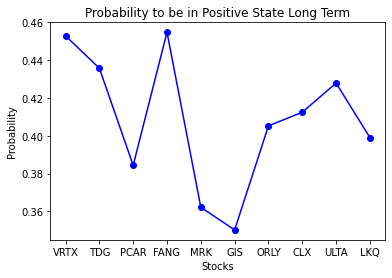

In [ ]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = df_days.index.values

# Define the y-axis values (the third entry of each stationary distribution)
y = [stationary[2] for stationary in stationaries]

# Plot the line graph
plt.plot(x, y, color='blue', marker='o')

# Set the title and axis labels
plt.title('Probability to be in Positive State Long Term')
plt.xlabel('Stocks')
plt.ylabel('Probability')

# Display the plot
plt.show()


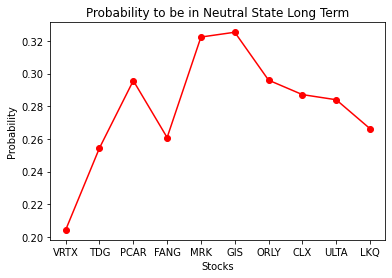

In [ ]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = df_days.index.values

# Define the y-axis values (the third entry of each stationary distribution)
y = [stationary[1] for stationary in stationaries]

# Plot the line graph
plt.plot(x, y, color='red', marker='o')

# Set the title and axis labels
plt.title('Probability to be in Neutral State Long Term')
plt.xlabel('Stocks')
plt.ylabel('Probability')

# Display the plot
plt.show()


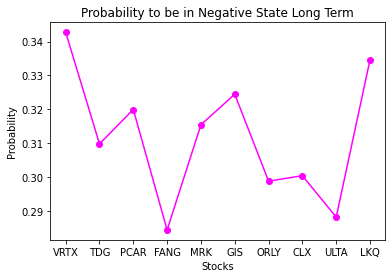

In [ ]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = df_days.index.values

# Define the y-axis values (the third entry of each stationary distribution)
y = [stationary[0] for stationary in stationaries]

# Plot the line graph
plt.plot(x, y, color='magenta', marker='o')

# Set the title and axis labels
plt.title('Probability to be in Negative State Long Term')
plt.xlabel('Stocks')
plt.ylabel('Probability')

# Display the plot
plt.show()
